# NOX_Make_lightcurves

A notebook to simulate light curves used to reproduce Kozlowski's Fig.2 , taking the code from `N0_Kozlowski_Fig2_Calculate`... 

Some light curves were made in  `/180404_light_curves/`

Another set (changing the `replace=True` to `replace=False` in 
             `np.random.choice(x, size=60, replace=False`))
was made in `/180713_light_curves_NEW/`


Saving to `/190208_light_curves/`


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.table import Table
import modules as mod
import os 

**a)** Simulate 100 light curves per $\tau$, with 100 values of $\tau$, given $t_{exp} = 8$ years, $SF_{\infty}=0.2$, select either N=60 or N=445 points  ( number of points sets $\Delta t$), sampling of SDSS QSO, or random for OGLE. Fit with the adaptative grid method, 60x60

## Simulate cadence of SDSS (N=60 pts) and OGLE (N=445 points) over 8 years 

60 60
445 445


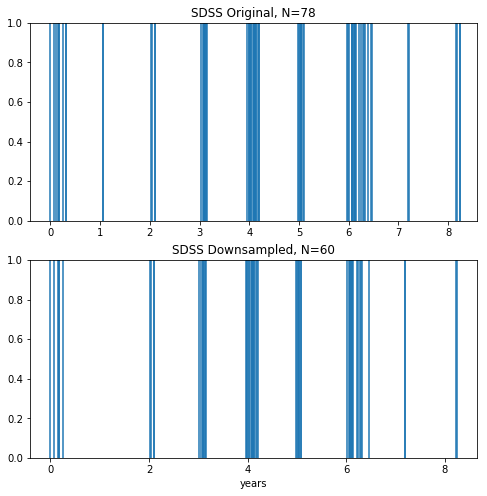

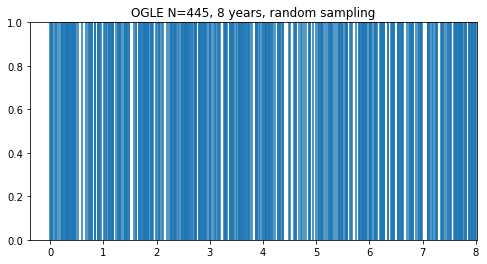

In [2]:
%matplotlib inline
# this has only names of QSOs...
#sdss_qso = fetch_dr7_quasar()

# the light curves are here 
# The S82 QSO light curves 
# http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html

# grab SDSS sampling from a random light curve ...
sdss = Table.read('../raw_data/SDSS_QSO/1000679', format='ascii')
sdss_times = sdss['col1'][1:]
sdss_times = sdss_times - min(sdss_times) # start from 0 

# add to the end of the light curve the same 
t = np.array(sdss_times) 
t = np.append(t, t[-1]+t[1:])

# select points up to 8 years 
m = t/365 < 8.5 

# select randomly 60 points

# np.random.randint(low=0, high=len(t[m]), size=60)
# NOTE:  can't use that -->  it has repetitions!!! 
# I had no idea ... better use np.random.choice(replace=False) 
# 
x  = np.arange(0, len(t[m]))
random_indices= np.sort(np.random.choice(x, size=60, replace=False))
t60 = np.sort(t[m][random_indices])
print(len(np.unique(t60)), len(t60))


# illustrate original points
fig,ax = plt.subplots(2,1,figsize=(8,8))
for l in t[m]:
    ax[0].axvline(l/365)
ax[0].set_title('SDSS Original, N='+ str(len(t[m])))
# choose 60 random points from that light curve
# selecting 60 indices 

# sort by time 
for l in t60:
    ax[1].axvline(l/365)
ax[1].set_title('SDSS Downsampled, N='+ str(len(t60)))
ax[1].set_xlabel('years')

# try to reproduce OGLE sampling by simply taking 
# random samples without repetition
# from a uniform distribution

#t445 = np.sort(np.random.randint(low=0, high=8*365, size=445))
# can't use random.randint - it contains repeated times! 

# instead make a super well-sampled true, 
# and sample at random places 
# to return array of desired length
length = 8*365 # 8 years in days 
a = np.linspace(0,length, 10000)
t445 = np.sort(np.random.choice(a, size=445, replace=False))
print(len(t445), len(np.unique(t445)))

fig,ax = plt.subplots(1,1,figsize=(8,4))
for l in t445 : 
    ax.axvline(l/365.)
ax.set_title('OGLE N=445, 8 years, random sampling')


# Since I am using random indices in both cases,
# store them given that I sample all light curves at
# these times !!!
np.savetxt('t_OGLE_update.txt', t445)
np.savetxt('t_SDSS_update.txt', t60)

## Simulate 10 000 light curves 

For SDSS, we use the sampling above:  8 years, with N=60 points. For OGLE we use 8 years, N=445, random sampling. We use the same sampling 10 000 times, with 100 light curves simulated per input $\tau$, over 100 values of $\tau$ between :

In [3]:
t_exp = 8 * 365 # days 
rho_in = np.array([0.001, 15])
tau_in = rho_in * t_exp
print(' %.2f < tau_in < %.2f  [days]'% (tau_in[0], tau_in[1]))

 2.92 < tau_in < 43800.00  [days]


In [4]:

SF_inf = 0.2 # mag 
t_exp = 8 * 365.0 # in days 
rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)
sigma = SF_inf / np.sqrt(2)
print('Input  SF_inf:', SF_inf, 'sigma:', sigma)

for simulation in ['OGLE', 'SDSS'] : 
    print(simulation)
    if simulation is 'SDSS' : 
        t = np.loadtxt('t_SDSS_update.txt')
    if simulation is 'OGLE':
        t = np.loadtxt('t_OGLE_update.txt')
    outDir = '../data_products/Simulated_DRW_Kozlowski/'+simulation+\
    '/190208_light_curves/'
    if not os.path.exists(outDir):
        os.makedirs(outDir)
        
    for i,rho_in in enumerate(rho_grid) : 
        tau_in = rho_in * t_exp
        if i % 10 == 0 :  print(i)
        # for each rho, simulate 100 light curves 
        for j in range(100):
            y = mod.sim_DRW_lightcurve(t, SF_inf, tau_in , 0)
            name = 'DRW_rho-' + str(i).zfill(3)+'_'+str(j).zfill(3)+'.txt'
            # store the ideal underlying light curve,
            # no photometric uncertainty 
            np.savetxt(outDir+name,y, fmt = ' %.7f ')            
print('Done')

Input  SF_inf: 0.2 sigma: 0.141421356237
OGLE
0
10
20
30
40
50
60
70
80
90
SDSS
0
10
20
30
40
50
60
70
80
90
Done
